In [7]:
import numpy as np
import pandas as pd
from PIL import ImageFont
import sys
#sys.path.insert(1, 'insert your path')

import matplotlib.font_manager as fm
import seaborn as sns
import tkinter as tk  
from tkinter import ttk,font  

#import accuracy score
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from FFNN import FFNN
from activation_functions import *
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import mean_squared_error
from utils import *

# now import the necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Conv3D, BatchNormalization, ZeroPadding2D, AveragePooling2D
from tensorflow.keras.utils import to_categorical

#import sgd
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import regularizers 
#import plotmodel
from tensorflow.keras.utils import plot_model
#import history
from tensorflow.keras.callbacks import History

import visualkeras

sns.set_palette("pastel")


# The TF CNN architecture

In [8]:
root = tk.Tk()
fonts = list(set([f.name for f in fm.fontManager.ttflist]))
fonts.sort()
combo = ttk.Combobox(root,value=fonts)  
font_type_1 = ImageFont.truetype(fm.findfont(fm.FontProperties(family=combo.get())),12)


#visualkeras.layered_view(model).show() # display using your system viewer
#visualkeras.layered_view(model, to_file='output.png') # write to disk
#visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model, legend=True, font=font_type_1, to_file='../figs/TF_CNN_arch.png')


NameError: name 'model' is not defined

In [9]:
# plot model architecture in a sideways manner
from keras.utils import plot_model

plot_model(model, to_file='../figs/TF_CNN_desc.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)

NameError: name 'model' is not defined

In [85]:
# import accuracy_score
from sklearn.metrics import accuracy_score
import seaborn as sns

Epoch 1/400
32/32 [==============================] - 3s 31ms/step - loss: 3.8400 - accuracy: 0.7717 - val_loss: 3.6376 - val_accuracy: 0.9842
Epoch 2/400
32/32 [==============================] - 0s 15ms/step - loss: 3.4817 - accuracy: 0.9862 - val_loss: 3.3704 - val_accuracy: 0.9921
Epoch 3/400
32/32 [==============================] - 0s 14ms/step - loss: 3.3299 - accuracy: 0.9872 - val_loss: 3.2989 - val_accuracy: 0.9921
Epoch 4/400
32/32 [==============================] - 0s 13ms/step - loss: 3.2758 - accuracy: 0.9881 - val_loss: 3.2568 - val_accuracy: 0.9881
Epoch 5/400
32/32 [==============================] - 0s 15ms/step - loss: 3.2337 - accuracy: 0.9891 - val_loss: 3.2089 - val_accuracy: 0.9921
Epoch 6/400
32/32 [==============================] - 0s 13ms/step - loss: 3.1921 - accuracy: 0.9911 - val_loss: 3.1676 - val_accuracy: 0.9960
Epoch 7/400
32/32 [==============================] - 0s 14ms/step - loss: 3.1481 - accuracy: 0.9891 - val_loss: 3.1272 - val_accuracy: 0.9921
Epoch 

<AxesSubplot:>

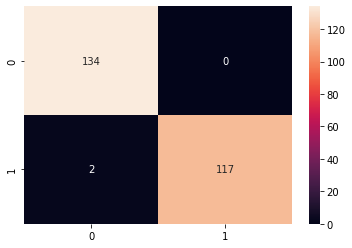

In [54]:
Xtrain, Xtest, ytrain, ytest = Ising.load_data()

y_test_copy = ytest.copy()

ytrain[ytrain < 2.269185314213022] = 0
ytrain[ytrain >= 2.269185314213022] = 1

ytest[ytest < 2.269185314213022] = 0
ytest[ytest >= 2.269185314213022] = 1

#shuffle y_copy in the exact same way as Xtrain and Xtest

# use the convolutional neural network to classify the data into two classes
# first reshape Xtrain and Xtest to 4D arrays
Xtrain = Xtrain.reshape(Xtrain.shape[0], 50, 50, 1)
Xtest = Xtest.reshape(Xtest.shape[0], 50, 50, 1)

# create model
model = Sequential()
# add model layers
l2_reg = regularizers.l2(0.01)
model.add(Conv2D(6, kernel_size=5, activation='leaky_relu',input_shape=(50,50,1), kernel_regularizer=l2_reg, padding='same'))
#model.add(AveragePooling2D(pool_size=(4, 4)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=5, activation='leaky_relu', kernel_regularizer=l2_reg, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(AveragePooling2D(pool_size=(4, 4)))
model.add(Flatten())
model.add(Dense(120, activation='relu', kernel_regularizer=l2_reg))
model.add(Dense(84, activation='relu', kernel_regularizer=l2_reg))
model.add(Dense(1, activation='sigmoid'))


# compile model using accuracy to measure model performance
sgd = SGD(learning_rate=0.001, decay=5e-6, momentum=0.9, nesterov=True)
adam = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

# train the model
history = model.fit(Xtrain, ytrain, validation_data=(Xtest, ytest), epochs=400)


# evaluate the model
pred = model.predict(Xtest)
soft_pred = pred
hard_pred = np.round(pred)
acc = accuracy_score(ytest, hard_pred)
print("accuracy with CNN = ", acc)

# plot confusion matrix with seaborn
cm = confusion_matrix(ytest, hard_pred)
sns.heatmap(cm, annot=True, fmt="d")


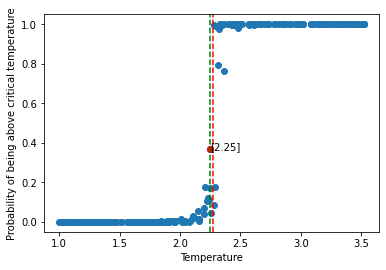

In [55]:
# plot the probabilities as function of temperature
plt.plot(y_test_copy, soft_pred, 'o')
plt.xlabel("Temperature")
plt.ylabel("Probability of being above critical temperature")

# highlight the point where the probability is closest to 0.5
plt.plot(y_test_copy[np.argmin(np.abs(soft_pred-0.5))], soft_pred[np.argmin(np.abs(soft_pred-0.5))], 'ro')
# print its temperature in the plot figure

plt.text(y_test_copy[np.argmin(np.abs(soft_pred-0.5))], soft_pred[np.argmin(np.abs(soft_pred-0.5))], 
            str(y_test_copy[np.argmin(np.abs(soft_pred-0.5))]))

# add vertical line at the critical temperature
plt.axvline(x=2.269185314213022, color='r', linestyle='--')

# add another vertical line at the temperature where the probability is closest to 0.5
# this is the temperature where the system is most likely to be in the critical state

plt.axvline(x=y_test_copy[np.argmin(np.abs(soft_pred-0.5))], color='g', linestyle='--') 

In [ ]:
Xtrain, Xtest, ytrain, ytest = Ising.load_data()

y_test_copy = ytest.copy()

ytrain[ytrain < 2.269185314213022] = 0
ytrain[ytrain >= 2.269185314213022] = 1
ytest[ytest < 2.269185314213022] = 0
ytest[ytest >= 2.269185314213022] = 1

#shuffle y_copy in the exact same way as Xtrain and Xtest

# use the convolutional neural network to classify the data into two classes
# first reshape Xtrain and Xtest to 4D arrays
Xtrain = Xtrain.reshape(Xtrain.shape[0], 50, 50, 1)
Xtest = Xtest.reshape(Xtest.shape[0], 50, 50, 1)


# create model
model_cla = Sequential()
# add model layers
l2_reg = regularizers.l2(0.01)
model_cla.add(Conv2D(6, kernel_size=5, activation='leaky_relu',input_shape=(50,50,1), kernel_regularizer=l2_reg, padding='same'))
#model.add(AveragePooling2D(pool_size=(4, 4)))
model_cla.add(MaxPooling2D(pool_size=(2, 2)))
model_cla.add(Conv2D(16, kernel_size=5, activation='leaky_relu', kernel_regularizer=l2_reg, padding='same'))
model_cla.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(AveragePooling2D(pool_size=(4, 4)))
model_cla.add(Flatten())
model_cla.add(Dense(120, activation='relu', kernel_regularizer=l2_reg))
model_cla.add(Dense(84, activation='relu', kernel_regularizer=l2_reg))
model_cla.add(Dense(1, activation='sigmoid'))


# compile model using accuracy to measure model performance
sgd = SGD(learning_rate=0.001, decay=5e-6, momentum=0.9, nesterov=True)
adam = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)


model_cla.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

# train the model
history = model_cla.fit(Xtrain, ytrain, validation_data=(Xtest, ytest), epochs=400)

# evaluate the model
pred = model_cla.predict(Xtest)
soft_pred = pred
hard_pred = np.round(pred)
acc = accuracy_score(ytest, hard_pred)
print("accuracy with CNN = ", acc)

In [8]:
#data = pd.read_csv("../data/50/s3_cfg_L50_A0_mc1000000_burn1_tl1.000_tu3.530.csv", header=None)
#X = data.iloc[:, :-1].to_numpy()
#y = data.iloc[:, -1][::50].to_numpy() # take every 50th row
#X = X.reshape(len(y), 50*50)
#y = y.reshape(len(y), 1)
#
## only select y with unique values and get the corresponding X
#y, y_idx = np.unique(y, return_index=True)
#y = y.reshape(len(y), 1)
#X = X[y_idx, :]
#X = X.reshape(len(y), 50, 50, 1)
#
## also sort y and x in ascending order
#idx = np.argsort(y, axis=0)
#y = y[idx]
#X = X[idx]
#
#
## iterate over the different temperatures and plot the probability of being above the critical temperature as animation
#for i in range(0, len(y)):
#    plt.clf()
#    # predict the temperature
#    pred = model.predict(X[i].reshape(1, 50, 50, 1))
#    # plot the configuration and the true temperature
#    plt.imshow(X[i].reshape(50, 50))
#    plt.title("True Temperature = " + str(y[i]))
#    #add legend with the predicted temperature and the probability of being above the critical temperature
#    plt.legend(["Predicted Temperature = " + str(pred[0][0]) + " Probability = "])
#    # make animation of the plots as mp4 movie
#    plt.savefig("movie/" + str(i) + ".png")
#
#    plt.pause(0.1)
#
## create the animation
#import imageio
#images = []
#for i in range(0, len(y)):
#    images.append(imageio.imread("movie/" + str(i) + ".png"))
#imageio.mimsave('movie/movie.mp4', images)



## Plotting my cnn arch # the max pooling could change size



8/8 [==============================] - 0s 6ms/step
rmse with LeNet-5 =  0.5923974208902005
rmse over average of ytest with LeNet-5 =  0.2684564428616324
rmse over average of y with LeNet-5 =  0.13223127550380434


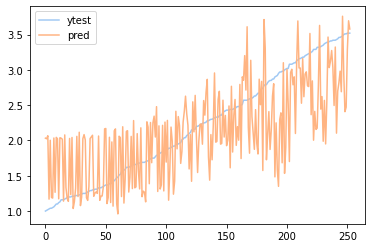

In [14]:
# now we replicate LeNet-5
Xtrain, Xtest, ytrain, ytest = Ising.load_data()
# first reshape Xtrain and Xtest to 4D arrays
Xtrain = Xtrain.reshape(Xtrain.shape[0], 50, 50, 1)
Xtest = Xtest.reshape(Xtest.shape[0], 50, 50, 1)
# create model
model = Sequential()
# add model layers
l2_reg = regularizers.l2(0.01)
model.add(Conv2D(6, kernel_size=5, activation='leaky_relu',input_shape=(50,50,1), kernel_regularizer=l2_reg, padding='same'))
#model.add(AveragePooling2D(pool_size=(4, 4)))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(AveragePooling2D(pool_size=(4, 4)))
model.add(Flatten())
model.add(Dense(10, activation='relu', kernel_regularizer=l2_reg))
model.add(Dense(1, activation='linear'))

# compile model using accuracy to measure model performance
sgd = SGD(learning_rate=0.001, decay=5e-6, momentum=0.9, nesterov=True)
adam = Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)


model.compile(optimizer=adam, loss='mse', metrics='mse')

# train the model
history = model.fit(Xtrain, ytrain, validation_data=(Xtest, ytest), epochs=1) #### change this

# evaluate the model
pred = model.predict(Xtest)
rmse = np.sqrt(mean_squared_error(pred, ytest.ravel()))
print("rmse with LeNet-5 = ", rmse)
# rmse over average of ytest
rmse = np.sqrt(mean_squared_error(pred, ytest.ravel()))/np.mean(ytest)
print("rmse over average of ytest with LeNet-5 = ", rmse)
# rmse over average of y
rmse = np.sqrt(mean_squared_error(pred, ytest.ravel()))/(np.mean(ytest)+np.mean(ytrain))
print("rmse over average of y with LeNet-5 = ", rmse)

# plot the results
order = np.argsort(ytest.ravel())
ytest = ytest[order]
pred = pred[order]
plt.plot(ytest, label="ytest")
plt.plot(pred, label="pred")
plt.legend()

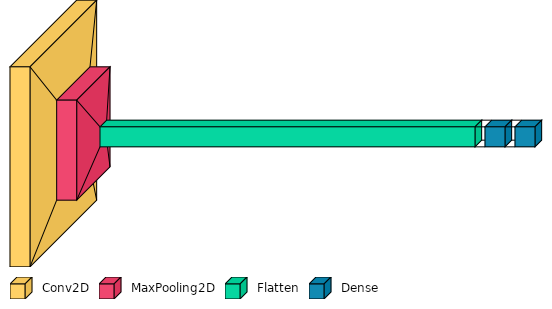

In [15]:
root = tk.Tk()
fonts = list(set([f.name for f in fm.fontManager.ttflist]))
fonts.sort()
combo = ttk.Combobox(root,value=fonts)  
font_type_1 = ImageFont.truetype(fm.findfont(fm.FontProperties(family=combo.get())),12)


#visualkeras.layered_view(model).show() # display using your system viewer
#visualkeras.layered_view(model, to_file='output.png') # write to disk
#visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model, legend=True, font=font_type_1, to_file='../figs/my_CNN_arch.png')


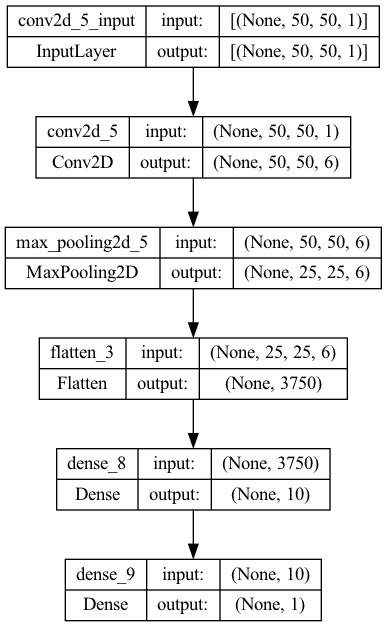

In [16]:
# plot model architecture in a sideways manner
from keras.utils import plot_model

plot_model(model, to_file='../figs/my_CNN_desc.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)